In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import spacy
import pytextrank
import re
import talib
import yfinance as yf
import pynance as pn

e:\Predicting Price Moves with News Sentiment week1\Predicting-Price-Moves-with-News-Sentiment-week1\.venv\Lib\site-packages


Load and prepare the data.

### PyNance for Financial Metrics


In [19]:
TICKER = "AAPL"
START = "2025-01-01"
END = "2025-11-20"

data = yf.download(TICKER, start=START, end=END)
print(data.head())


C:\Users\Abas\AppData\Local\Temp\ipykernel_6808\3911808453.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=START, end=END)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-01-02  242.752090  247.978453  240.731232  247.809205  55740700
2025-01-03  242.264282  243.080582  240.800900  242.264282  40244100
2025-01-06  243.896912  246.216423  242.105013  243.210016  45045600
2025-01-07  241.119476  244.444435  240.263348  241.885999  40856000
2025-01-08  241.607269  242.612732  238.969207  240.830782  37628900


In [21]:
data.columns = data.columns.get_level_values(0)
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,242.752090,247.978453,240.731232,247.809205,55740700
2025-01-03,242.264282,243.080582,240.800900,242.264282,40244100
2025-01-06,243.896912,246.216423,242.105013,243.210016,45045600
2025-01-07,241.119476,244.444435,240.263348,241.885999,40856000
2025-01-08,241.607269,242.612732,238.969207,240.830782,37628900
...,...,...,...,...,...
2025-11-13,272.950012,276.700012,272.089996,274.109985,49602800
2025-11-14,272.410004,275.959991,269.600006,271.049988,47431300
2025-11-17,267.459991,270.489990,265.730011,268.820007,45018300


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2025-01-02 to 2025-11-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   222 non-null    float64
 1   High    222 non-null    float64
 2   Low     222 non-null    float64
 3   Open    222 non-null    float64
 4   Volume  222 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 10.4 KB


In [23]:
data.dropna()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,242.752090,247.978453,240.731232,247.809205,55740700
2025-01-03,242.264282,243.080582,240.800900,242.264282,40244100
2025-01-06,243.896912,246.216423,242.105013,243.210016,45045600
2025-01-07,241.119476,244.444435,240.263348,241.885999,40856000
2025-01-08,241.607269,242.612732,238.969207,240.830782,37628900
...,...,...,...,...,...
2025-11-13,272.950012,276.700012,272.089996,274.109985,49602800
2025-11-14,272.410004,275.959991,269.600006,271.049988,47431300
2025-11-17,267.459991,270.489990,265.730011,268.820007,45018300


In [24]:
data["Volume"] = data["Volume"].astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2025-01-02 to 2025-11-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   222 non-null    float64
 1   High    222 non-null    float64
 2   Low     222 non-null    float64
 3   Open    222 non-null    float64
 4   Volume  222 non-null    float64
dtypes: float64(5)
memory usage: 10.4 KB


In [27]:
# Calculate Simple Moving Averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()

In [28]:
print(data[['Close', 'SMA_20', 'SMA_50', 'SMA_100']].tail())


Price            Close      SMA_20      SMA_50     SMA_100
Date                                                      
2025-11-13  272.950012  267.093961  255.045912  236.166864
2025-11-14  272.410004  268.112178  255.704954  236.879598
2025-11-17  267.459991  268.385876  256.301161  237.548421
2025-11-18  267.440002  268.632101  256.967501  238.216246
2025-11-19  268.559998  269.150116  257.807293  238.854456


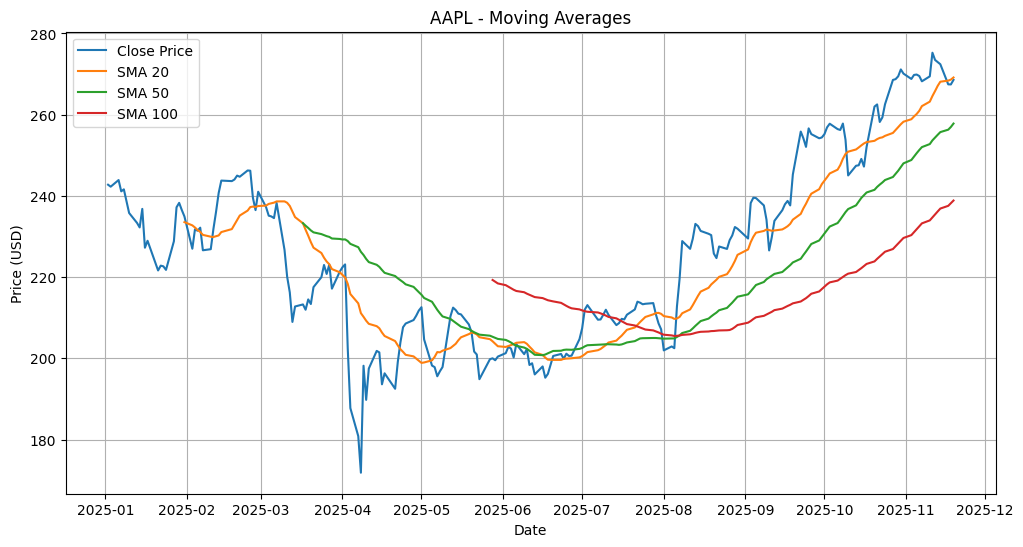

In [29]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['SMA_50'], label='SMA 50')
plt.plot(data['SMA_100'], label='SMA 100')

plt.legend()
plt.title("AAPL - Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [30]:
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

In [31]:
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(
    data['Close'], 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

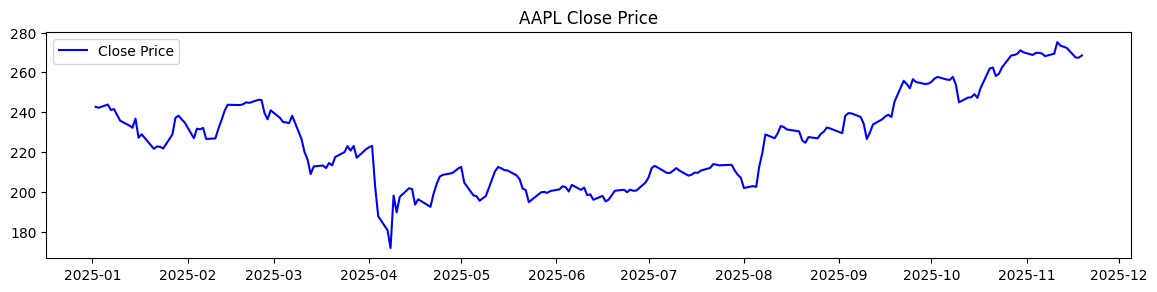

In [ ]:
# Closing Price


plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title(f'{TICKER} Close Price')
plt.legend()

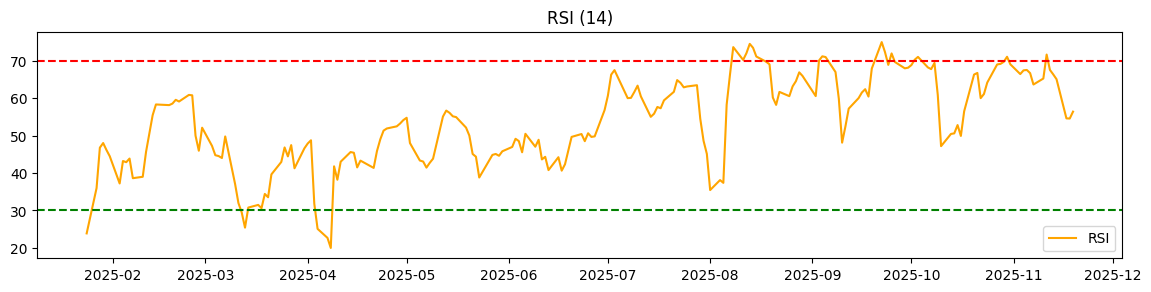

In [37]:
# RSI

plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI (14)')
plt.legend()

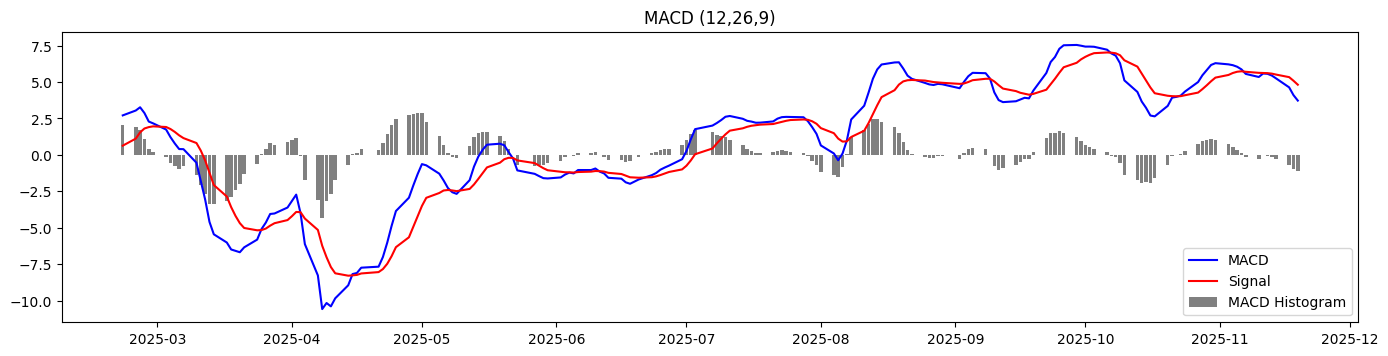

In [38]:
# MACD
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 3)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_Signal'], label='Signal', color='red')
plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='gray')
plt.title('MACD (12,26,9)')
plt.legend()

plt.tight_layout()
plt.show()